In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Loading Data from .csv file and data is to huge its showing warning to exclude that worning we use low_memory

In [2]:
df=pd.read_csv("loan.csv", low_memory=False)
print(df.shape)
df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 2. Data Cleaning

#### Removing all columns having all values are NA or having same value in whole column

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\Manoj\AppData\Local\Temp/ipykernel_13432/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [4]:
df=df.dropna(how='all', axis=1)
df.shape

(39717, 57)

#### Removing columns having unique calues in all columns

In [5]:
for i in df.columns:
    print(i,df[i].unique())


id [1077501 1077430 1077175 ...   90395   90376   87023]
member_id [1296599 1314167 1313524 ...   90390   89243   86999]
loan_amnt [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050

In [6]:
df=df.drop(["pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"], axis=1)
df.shape

(39717, 48)

#### Removing of features which are not required to identify insights 

Some of the features are specific to every borrowers like title, url, zip etc, accordingly identify the variables and removing it

In [7]:
df=df.drop(['title','url','desc','zip_code','emp_title','id','member_id','sub_grade','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)
print(df.shape)
df.info()

(39717, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   emp_length               38642 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  addr_state

### Fixing missing values

In [8]:
#df.info()
#df.isna().sum()
(df.isna().sum()/len(df.index))*100


loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

#### Removing null values from revol_util and last_pymnt_d as percentage is low so it will not impact analysis

In [9]:
df=df.dropna(axis=0, subset= ['last_pymnt_d','revol_util','last_credit_pull_d'])
print(df.shape)
(df.isna().sum()/len(df.index))*100

(39598, 37)


loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_length                 2.694581
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

In [10]:
df.emp_length.value_counts()
##df.emp_length.mode()[0]

10+ years    8869
< 1 year     4563
2 years      4377
3 years      4084
4 years      3422
5 years      3268
1 year       3225
6 years      2225
7 years      1769
8 years      1474
9 years      1255
Name: emp_length, dtype: int64

#### From above count, maximum frequency is >10+ years, if null will be replace with max value it wil give impact our analysis, prefer to replace emp_length of n/a with < 1 year

In [11]:
df.emp_length.fillna('< 1 year')

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39598, dtype: object

In [12]:
df.emp_length=df.emp_length.fillna('< 1 year')
df.emp_length.isna().sum()

0

#### Data varies from 0 to 2, assigning median value to missing values

In [13]:
df.pub_rec_bankruptcies.value_counts()

0.0    37228
1.0     1667
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [14]:
df.pub_rec_bankruptcies.median()

0.0

In [15]:
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median())
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amn

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39598 non-null  int64  
 1   funded_amnt              39598 non-null  int64  
 2   funded_amnt_inv          39598 non-null  float64
 3   term                     39598 non-null  object 
 4   int_rate                 39598 non-null  object 
 5   installment              39598 non-null  float64
 6   grade                    39598 non-null  object 
 7   emp_length               39598 non-null  object 
 8   home_ownership           39598 non-null  object 
 9   annual_inc               39598 non-null  float64
 10  verification_status      39598 non-null  object 
 11  issue_d                  39598 non-null  object 
 12  loan_status              39598 non-null  object 
 13  purpose                  39598 non-null  object 
 14  addr_state            

In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## 3. Data Manipulation

1. Removing loan_status='Current', as we can not identify the borrowers will become Default or Fully Paid since loan is still in progress
2. Remove '%' from int_rate and converting to numeric
3. Remove '+', '<', 'year' characters from the string and converting years to numeric
4. Remove '%' from revol_util and converting to numeric

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
df=df[df['loan_status']!='Current']
df.shape

(38458, 37)

In [20]:
df.int_rate=df.int_rate.apply(lambda x: float(x.replace('%','')))


In [21]:
df.emp_length=df.emp_length.apply(lambda x: '0' if '< 1 year' in x else(x.replace('+','')))


In [22]:
df.emp_length=df.emp_length.apply(lambda x: int(x.replace(' years','').replace(' year','')))
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [23]:
df.revol_util=df.revol_util.apply(lambda x: float(x.replace('%','')))

### Outliers Removal

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


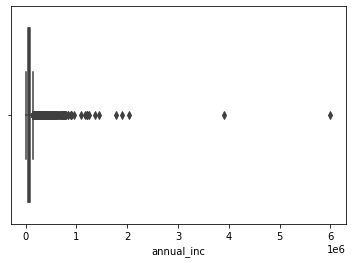

In [24]:
sns.boxplot(df['annual_inc'])

plt.show()

#conclusion: From below plot it is clearly identified that outliers exists

In [25]:
df.annual_inc.describe()

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [26]:
df.annual_inc.quantile([0.25,0.5,0.75,0.9,0.92,0.95,0.97,0.98,0.99])

#conclusion: remove the data which are to after 95 percentile, because spread of data is large after 95 percentile

0.25     40000.00
0.50     59000.00
0.75     82000.00
0.90    115200.00
0.92    122134.24
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234258.00
Name: annual_inc, dtype: float64

In [27]:
df=df[df.annual_inc<df.annual_inc.quantile(0.95)]

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


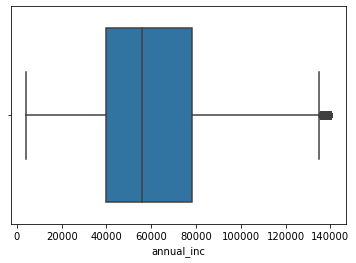

In [29]:
sns.boxplot(df.annual_inc)
plt.show()

In [30]:
df.funded_amnt_inv.describe()

count    36525.000000
mean      9906.497690
std       6729.456776
min          0.000000
25%       4994.231882
50%       8400.000000
75%      13650.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [31]:
df.funded_amnt_inv.quantile([0.25,0.5,0.75,0.9,0.92,0.95,0.97,0.98,0.99])

0.25     4994.231882
0.50     8400.000000
0.75    13650.000000
0.90    19750.000000
0.92    20000.000000
0.95    23946.672246
0.97    24975.000000
0.98    27954.140575
0.99    31961.746627
Name: funded_amnt_inv, dtype: float64

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


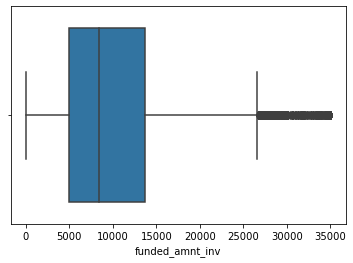

In [32]:
### As per above quartiles distribution is continuous, no need to remove ouliers
sns.boxplot(df.funded_amnt_inv)
plt.show()

In [33]:
df.loan_amnt.quantile([0.25,0.5,0.75,0.9,0.92,0.95,0.97,0.98,0.99,1])

0.25     5000.0
0.50     9250.0
0.75    15000.0
0.90    20000.0
0.92    22400.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [34]:
#conclusion: after 97 percentile observing less variation in data, removing the same
df=df[df.loan_amnt<df.loan_amnt.quantile(0.97)]

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


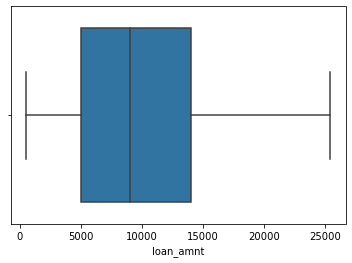

In [35]:
sns.boxplot(df.loan_amnt)
plt.show()

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


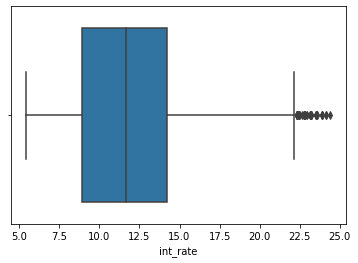

count    35424.000000
mean        11.764515
std          3.592905
min          5.420000
25%          8.900000
50%         11.660000
75%         14.220000
max         24.400000
Name: int_rate, dtype: float64

In [36]:
sns.boxplot(df.int_rate)
plt.show()

df.int_rate.describe()

#Conclusion: From this observation we have identified that, average rate is approx. 12%, post 75th percentile rate incresed to ~25% from ~15%

### 3. Data Analysis
#### Univarient analysis

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


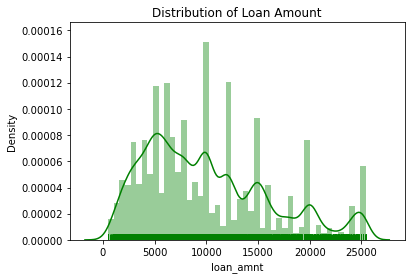

In [37]:
sns.distplot(df['loan_amnt'], rug=True, color='g')
plt.title('Distribution of Loan Amount')
plt.show()

#conclusion: majority loan amount belongs to 5000 to 15000

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


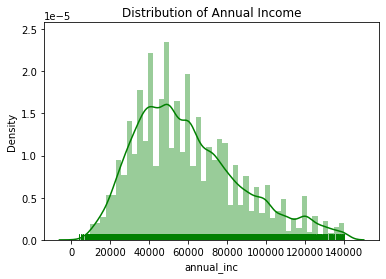

In [38]:
sns.distplot(df['annual_inc'], rug=True, color='g')
plt.title('Distribution of Annual Income')
plt.show()

###Conclusion: Most of the borrowers are having annual income within range of 30000 to 60000 are taking the loan

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


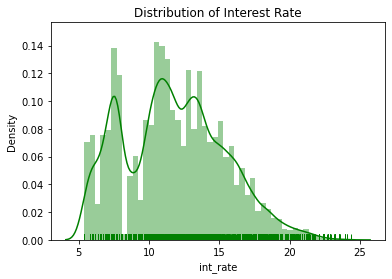

In [39]:
sns.distplot(df['int_rate'], rug=True, color='g')
plt.title('Distribution of Interest Rate')
plt.show()

###Conclusion: Most of the loans are having interest rate within the range of 10% to 15%

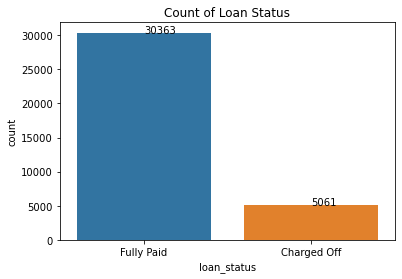

In [40]:
sns.countplot(x='loan_status',data=df)
l=df.loan_status.value_counts()
for i, j in l.reset_index().iterrows():
    plt.text(i, j.loan_status, j.loan_status)
    
plt.title('Count of Loan Status')
plt.show()
    
###Conclusion: 14% of loans are charged_off out of loan issued

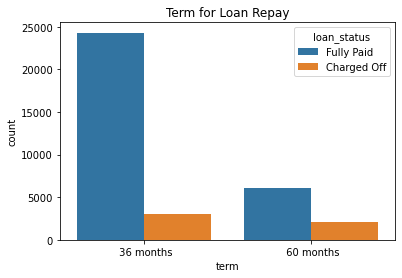

In [41]:
sns.countplot(x='term',data=df, hue='loan_status')
plt.title('Term for Loan Repay')
plt.show()

###Conclusion: Borrower who had taken the loan for 60 months terms having maximum chances to charged_off compare to 36 months terms

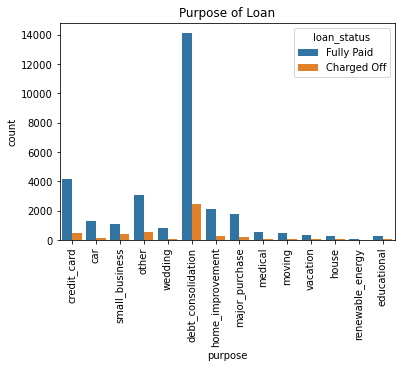

In [42]:
sns.countplot(x='purpose',data=df, hue='loan_status')
plt.xticks(rotation='90')
plt.title('Purpose of Loan')
plt.show()

###Conclusion: Measurely borrowers are taking loan for debt consolidation and paying credit card bills and evens charged_off is also maximum for these too categories

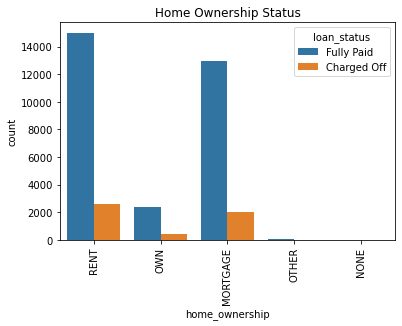

In [43]:
sns.countplot(x='home_ownership',data=df, hue='loan_status')
plt.xticks(rotation='90')
plt.title('Home Ownership Status')
plt.show()

###Conclusion: Measurely borrowers are taking loan are living in rented house or mortgaze their house and applicants numbers are high do charged_off is also maximum for these categories

### Bivarient Analysis

loan_status             purpose  Charged Off  Fully Paid  proportion
13                      wedding           84         792    0.095890
6                major_purchase          209        1804    0.103825
1                   credit_card          495        4156    0.106429
0                           car          158        1286    0.109418
4              home_improvement          302        2151    0.123115
12                     vacation           52         311    0.143251
2            debt_consolidation         2473       14119    0.149048
5                         house           49         271    0.153125
7                       medical          100         533    0.157978
9                         other          581        3045    0.160232
8                        moving           89         457    0.163004
3                   educational           51         255    0.166667
10             renewable_energy           17          76    0.182796
11               small_business   

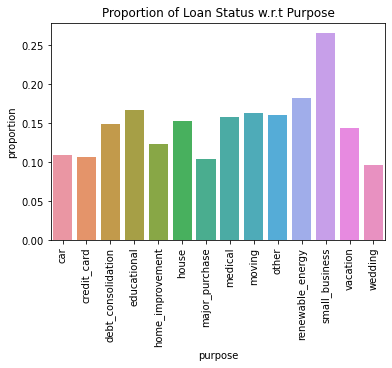

In [44]:
df1=df.groupby(['purpose','loan_status']).loan_status.count().unstack().reset_index()
df1['proportion']=df1['Charged Off']/(df1['Charged Off']+df1['Fully Paid'])
print(df1.sort_values(['proportion']))


sns.barplot(x='purpose', y='proportion', data=df1)
plt.xticks(rotation='90')
plt.title('Proportion of Loan Status w.r.t Purpose')

plt.show()

#conclusion: borowwer who had taken the loan for small_business is having maximum chances of charged_off

loan_status grade  Charged Off  Fully Paid  proportion
0               A          584        8966    0.061152
1               B         1325        9524    0.122131
2               C         1254        6011    0.172608
3               D         1015        3621    0.218939
4               E          568        1587    0.263573
5               F          239         514    0.317397
6               G           76         140    0.351852


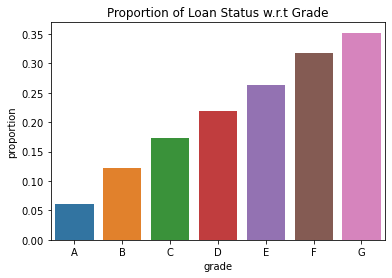

In [45]:
df1_garde=df.groupby(['grade','loan_status']).loan_status.count().unstack().reset_index()
df1_garde['proportion']=df1_garde['Charged Off']/(df1_garde['Charged Off']+df1_garde['Fully Paid'])
print(df1_garde.sort_values(['proportion']))


sns.barplot(x='grade', y='proportion', data=df1_garde)
#plt.xticks(rotation='90')

plt.title('Proportion of Loan Status w.r.t Grade')

plt.show()

#conclusion: Chances of chrged_off is increasing with grade moving from A to G. A is having less chances of being charged_od whereas F and G grade are having high chances of being chrged_off

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  proportion
0                             0.0         4717       29142    0.139313
1                             1.0          342        1218    0.219231
2                             2.0            2           3    0.400000


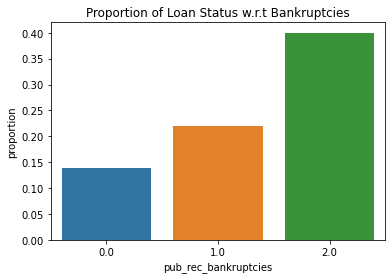

In [46]:
df1_bankruptcies=df.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count().unstack().reset_index()
df1_bankruptcies['proportion']=df1_bankruptcies['Charged Off']/(df1_bankruptcies['Charged Off']+df1_bankruptcies['Fully Paid'])
print(df1_bankruptcies.sort_values(['proportion']))


sns.barplot(x='pub_rec_bankruptcies', y='proportion', data=df1_bankruptcies)
#plt.xticks(rotation='90')

plt.title('Proportion of Loan Status w.r.t Bankruptcies')

plt.show()

#conclusion: No. of pub_rec_bankruptcies is 2 having maximum charged_off, it means who were defulted earlier having more chances of defaulted in future

###### Making of buckets based on loan amount, annual income and interest rate, which is useful in further analysis

In [47]:
df['loan_category']=pd.cut(df.loan_amnt,[0,5000,10000,15000,20000,25000,30000],labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000+'])
df['inc_category']=pd.cut(df.annual_inc,[0,10000,20000,30000,40000,50000,60000,70000,80000,100000],labels=['0-10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000+'])
df['int_rate_category']=pd.cut(df.int_rate,[0,10,12.5,16,20],labels=['0-10', '10-13', '12.5-16', '16 +'])

In [48]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_category,inc_category,int_rate_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0-5000,20000-30000,10-13
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0-5000,20000-30000,12.5-16
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0-5000,10000-20000,12.5-16
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,5000-10000,40000-50000,12.5-16
5,5000,5000,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0-5000,30000-40000,0-10


loan_status inc_category  Charged Off  Fully Paid  proportion
8                 80000+          456        3744    0.108571
7            70000-80000          407        2937    0.121711
6            60000-70000          513        3433    0.130005
4            40000-50000          840        4807    0.148752
5            50000-60000          822        4639    0.150522
3            30000-40000          901        4226    0.175736
2            20000-30000          590        2764    0.175909
1            10000-20000          200         859    0.188857
0                0-10000           19          74    0.204301


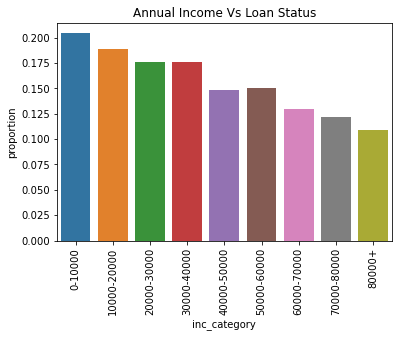

In [49]:
df1_annual_inc=df.groupby(['inc_category','loan_status']).loan_status.count().unstack().reset_index()
df1_annual_inc['proportion']=df1_annual_inc['Charged Off']/(df1_annual_inc['Charged Off']+df1_annual_inc['Fully Paid'])
print(df1_annual_inc.sort_values(['proportion']))


sns.barplot(x='inc_category', y='proportion', data=df1_annual_inc)
plt.xticks(rotation='90')
plt.title('Annual Income Vs Loan Status')
plt.show()

#conclusion: Borrower who is having 80000+ annual income having less charged_off, while 0-10000 is having maximum chances of charged_off may be due to less income
#also it observed that incresed in annual income decreased in the charged off porportion

loan_status int_rate_category  Charged Off  Fully Paid  proportion
0                        0-10          801       10900    0.068456
1                       10-13         1149        7555    0.132008
2                     12.5-16         1853        8760    0.174597
3                        16 +         1054        2841    0.270603


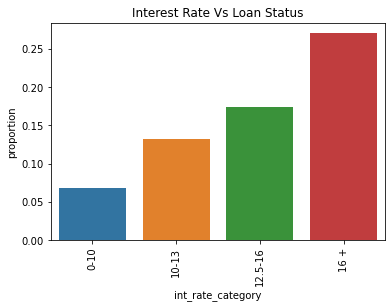

In [50]:
df1_int_rate=df.groupby(['int_rate_category','loan_status']).loan_status.count().unstack().reset_index()
df1_int_rate['proportion']=df1_int_rate['Charged Off']/(df1_int_rate['Charged Off']+df1_int_rate['Fully Paid'])
print(df1_int_rate.sort_values(['proportion']))


sns.barplot(x='int_rate_category', y='proportion', data=df1_int_rate)
plt.xticks(rotation='90')
plt.title('Interest Rate Vs Loan Status')
plt.show()

#conclusion: less chances of being charged_off 10%, while 16%+ interst rate maximum chances of charged_off 
#also it is observed that incresed in interest rate leads to the increase in the charged off porportion

In [51]:
df['dti_category']=pd.cut(df.dti,[0,5,10,15,20,25],labels=['0-5', '5-10', '10-15', '15-20', '25 +'])
#df.dti.describe()

In [52]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_category,inc_category,int_rate_category,dti_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,...,0.00,0.00,Jan-15,171.62,May-16,0.0,0-5000,20000-30000,10-13,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0-5000,20000-30000,12.5-16,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,...,0.00,0.00,Jun-14,649.91,May-16,0.0,0-5000,10000-20000,12.5-16,5-10
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,5000-10000,40000-50000,12.5-16,15-20
5,5000,5000,5000.0,36 months,7.90,156.46,A,3,RENT,36000.0,...,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0-5000,30000-40000,0-10,10-15


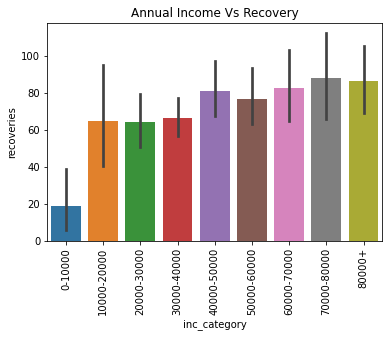

In [53]:

sns.barplot(x='inc_category', y='recoveries', data=df)
plt.xticks(rotation='90')

plt.title('Annual Income Vs Recovery')
plt.show()

#conclusion: loan amount is recovered when annual income is high 


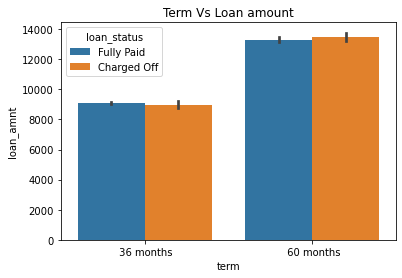

In [54]:
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=df)
plt.title('Term Vs Loan amount')
plt.show()

#conclusion: if loan_amount is high then pay term is also high

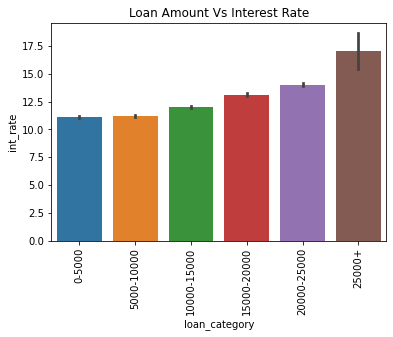

In [55]:
sns.barplot(x='loan_category', y='int_rate', data=df)
plt.xticks(rotation='90')

plt.title('Loan Amount Vs Interest Rate')
plt.show()

#conclusion: interest rate is increasing for higher loan amount

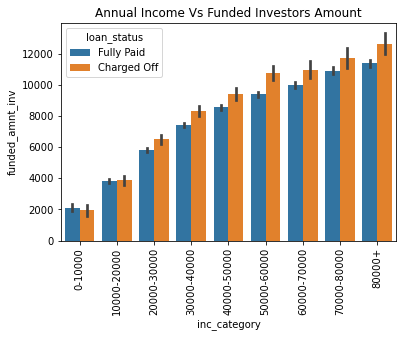

In [56]:
sns.barplot(x='inc_category', y='funded_amnt_inv', hue='loan_status',data=df)
plt.xticks(rotation='90')

plt.title('Annual Income Vs Funded Investors Amount')
plt.show()

#conclusion: if annualincome is high then loan amount approved by investor is also high and there is maximum chances of charged off for high funded amount


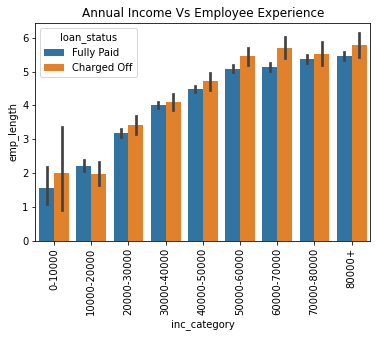

In [57]:
sns.barplot(x='inc_category', y='emp_length', hue='loan_status',data=df)
plt.xticks(rotation='90')

plt.title('Annual Income Vs Employee Experience')
plt.show()

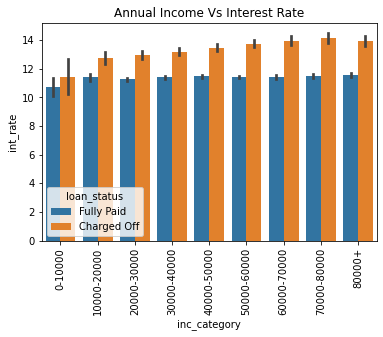

In [58]:
sns.barplot(x='inc_category', y='int_rate', hue='loan_status',data=df)
plt.xticks(rotation='90')

plt.title('Annual Income Vs Interest Rate')
plt.show()

### Multivarient Analysis

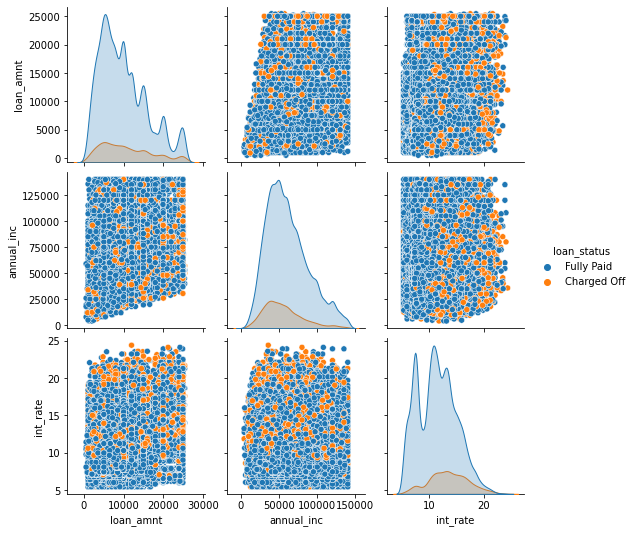

In [59]:
sns.pairplot(df, vars=['loan_amnt', 'annual_inc', 'int_rate'], hue='loan_status')
plt.show()

#conclusion: 
#1. maximum chances of charged off if loan amount is high because for high loan amount interest rate is also high
#2. higher annual income is geeting high loan amount

## 4. Observations:

#### Please find below recommendations, based on analysis done to avoid applicants who may be become default

1. If applicant is already default and receives loan application again then it should be rejected, as high chances of charged-off again
2. If applicant is having annual income below 60K and loan amount with interest rate 12% and above
3. If interest rate is above 15% then high chances of charge-off
4. If applicant is taking loan of 5K and above with interest rate 15% and above
5. If applicants home ownership is either Rented or Mortgage
6. Applicants who are taking loan for small business having higher chances of charged-off
7. Applicant who are taking loan for large time period maximum chances of charged-off
8. Applicants whose grade is G having maximum chances of charged-off
9. Applicants whose work experience is less having maximum chances of charged-off
